In [115]:
from numpy import mean, std
import pandas as pd
import yfinance as yf
import numpy as np

import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [140]:
# define date range
start_date = '2005-01-22'
end_date = '2023-02-22'


In [3]:
diction = {'Gold': 'GC=F', 'US treas bonds':'QLTA', '13w': '^INX','5y': '^FNX','10y': '^TNX','sp500': 'SPY'}

for i in diction:
    print(diction[i])

GC=F
QLTA
^INX
^FNX
^TNX
SPY


In [170]:
# retrieve markets


data = yf.download(['GC=F', 'QLTA', '^INX', '^FNX', '^TNX', 'SPY'], start_date, end_date)
print(data)

[*********************100%***********************]  6 of 6 completed

2 Failed downloads:
- ^FNX: No data found for this date range, symbol may be delisted
- ^INX: No data found for this date range, symbol may be delisted
              Adj Close                                                Close  \
                   GC=F       QLTA         SPY ^FNX ^INX   ^TNX         GC=F   
Date                                                                           
2015-01-22  1300.699951  42.443699  178.042374  NaN  NaN  1.896  1300.699951   
2015-01-23  1292.599976  42.702579  177.066223  NaN  NaN  1.817  1292.599976   
2015-01-26  1279.400024  42.629784  177.480881  NaN  NaN  1.828  1279.400024   
2015-01-27  1291.699951  42.589298  175.139801  NaN  NaN  1.825  1291.699951   
2015-01-28  1285.900024  42.920963  172.893784  NaN  NaN  1.724  1285.900024   
...                 ...        ...         ...  ...  ...    ...          ...   
2023-02-14  1854.000000  47.250000  412.640015  NaN  NaN  

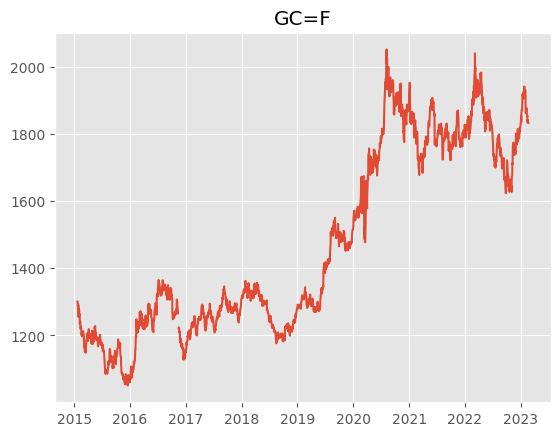

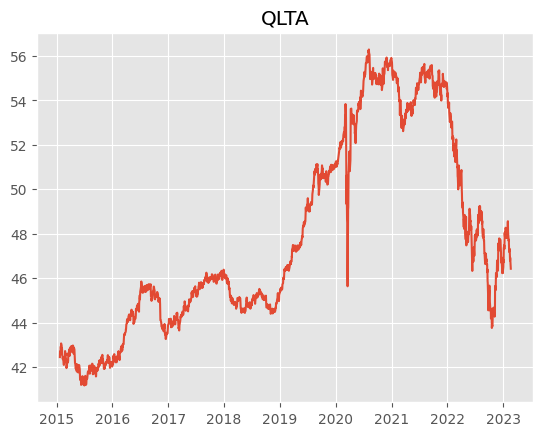

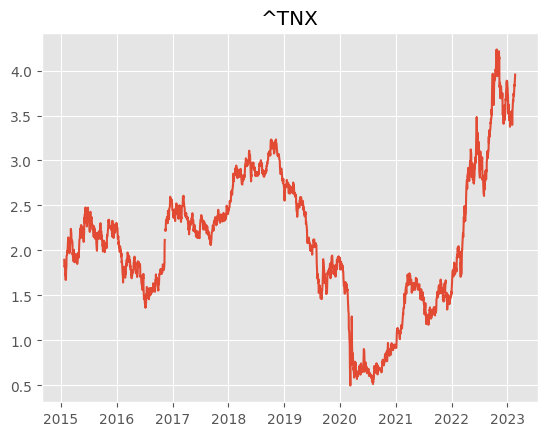

In [160]:
plt.plot(data[('Adj Close', 'GC=F')])
plt.title('GC=F')
plt.show()

plt.plot(data[('Adj Close', 'QLTA')])
plt.title('QLTA')
plt.show()

plt.plot(data[('Adj Close', '^TNX')])
plt.title('^TNX')
plt.show()

In [148]:
print(data.columns)
print(data['Adj Close'].head())

MultiIndex([('Adj Close', 'GC=F'),
            ('Adj Close', 'QLTA'),
            ('Adj Close',  'SPY'),
            ('Adj Close', '^FNX'),
            ('Adj Close', '^INX'),
            ('Adj Close', '^TNX'),
            (    'Close', 'GC=F'),
            (    'Close', 'QLTA'),
            (    'Close',  'SPY'),
            (    'Close', '^FNX'),
            (    'Close', '^INX'),
            (    'Close', '^TNX'),
            (     'High', 'GC=F'),
            (     'High', 'QLTA'),
            (     'High',  'SPY'),
            (     'High', '^FNX'),
            (     'High', '^INX'),
            (     'High', '^TNX'),
            (      'Low', 'GC=F'),
            (      'Low', 'QLTA'),
            (      'Low',  'SPY'),
            (      'Low', '^FNX'),
            (      'Low', '^INX'),
            (      'Low', '^TNX'),
            (     'Open', 'GC=F'),
            (     'Open', 'QLTA'),
            (     'Open',  'SPY'),
            (     'Open', '^FNX'),
            (     'O

In [169]:

def rs_ratio(prices_df, benchmark, window=14):
    """
    Method to return dataframe with relative strength ratio for each symbol
    """
    
    ratio_df = pd.DataFrame()
    
    for column in prices_df:
        rs = (prices_df[column] / benchmark) * 100
        rs_ratio = rs.rolling(window).mean()
        rel_ratio = 100 + ((rs_ratio - rs_ratio.mean()) / rs_ratio.std() + 1)
    
        ratio_df[f'{column}_ratio'] = rel_ratio
        
    ratio_df.dropna(axis=0, how='all', inplace=True)
    
    return ratio_df

ratio_df = rs_ratio(data['Adj Close'], data[('Adj Close', 'SPY')])
print(ratio_df[-40:])

            GC=F_ratio  QLTA_ratio  SPY_ratio  ^FNX_ratio  ^INX_ratio  \
Date                                                                    
2022-12-05   99.848904   99.413114        NaN         NaN         NaN   
2022-12-06   99.852343   99.421695        NaN         NaN         NaN   
2022-12-07   99.857171   99.429889        NaN         NaN         NaN   
2022-12-08   99.861163   99.435791        NaN         NaN         NaN   
2022-12-09   99.873537   99.442966        NaN         NaN         NaN   
2022-12-12   99.878533   99.446337        NaN         NaN         NaN   
2022-12-13   99.892348   99.451214        NaN         NaN         NaN   
2022-12-14   99.908151   99.457189        NaN         NaN         NaN   
2022-12-15   99.925109   99.467773        NaN         NaN         NaN   
2022-12-16   99.946271   99.477898        NaN         NaN         NaN   
2022-12-19   99.967864   99.488839        NaN         NaN         NaN   
2022-12-20  100.006830   99.501317        NaN      

In [168]:
def rs_momentum(prices_df, benchmark, window=14):
    """
    Method to return dataframe with relative strength momentum for each symbol
    """
    
    momentum_df = pd.DataFrame()
    
    for column in prices_df:
        rs = (prices_df[column] / benchmark) * 100
        rs_ratio = rs.rolling(window).mean()
        
        rs_momentum = rs_ratio - rs_ratio.shift(window)
        rel_momentum = 100 + ((rs_momentum - rs_momentum.mean()) / rs_momentum.std() + 1)
        momentum_df[f'{column}_momentum'] = rel_momentum
        
    momentum_df.dropna(axis=0, how='all', inplace=True)
    
    return momentum_df

momentum_df = rs_momentum(data['Adj Close'], data[('Adj Close', 'SPY')])
print(momentum_df[-40:])

            GC=F_momentum  QLTA_momentum  SPY_momentum  ^FNX_momentum  \
Date                                                                    
2022-11-16     100.685821     100.463050           NaN            NaN   
2022-11-17     100.907558     100.624355           NaN            NaN   
2022-11-18     101.121511     100.776083           NaN            NaN   
2022-11-21     101.297894     100.906148           NaN            NaN   
2022-11-22     101.341023     100.905840           NaN            NaN   
2022-11-23     101.392219     100.913851           NaN            NaN   
2022-11-25     101.387925     100.932287           NaN            NaN   
2022-11-28     101.392417     101.000200           NaN            NaN   
2022-11-29     101.351403     101.059204           NaN            NaN   
2022-11-30     101.219954     101.026468           NaN            NaN   
2022-12-01     101.207659     101.062010           NaN            NaN   
2022-12-02     101.175170     101.110658           

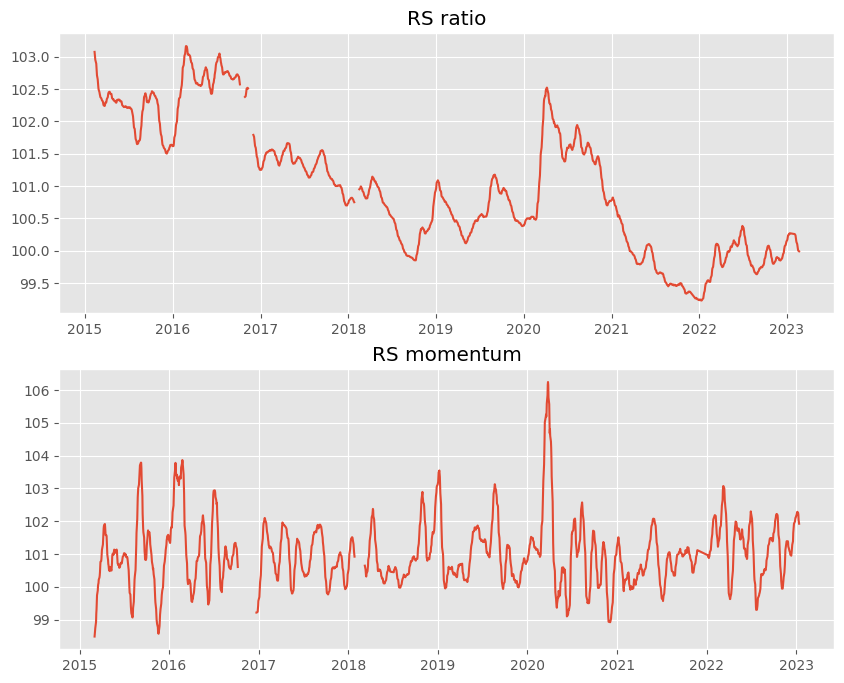

In [167]:
def visualize_rs(symbol:str):
    fig, ax = plt.subplots(2, 1, figsize=(10, 8))
    ax[0].plot(ratio_df[f'{symbol}_ratio'], label=ratio_df.columns)
    ax[0].set_title('RS ratio')
    #ax[0].legend()

    ax[1].plot(momentum_df[f'{symbol}_momentum'], label=momentum_df.columns)
    ax[1].set_title('RS momentum')
    #ax[1].legend()
    plt.show()
    
visualize_rs('GC=F')

In [166]:
# merge rs ratio and momentum data
df = pd.merge(ratio_df, momentum_df, left_on=ratio_df.index, right_on=momentum_df.index).set_index('key_0')

print(df[-40:])

            GC=F_ratio  QLTA_ratio  SPY_ratio  ^FNX_ratio  ^INX_ratio  \
key_0                                                                   
2022-11-16   99.855213   99.411338        NaN         NaN         NaN   
2022-11-17   99.876194   99.415346        NaN         NaN         NaN   
2022-11-18   99.891859   99.417816        NaN         NaN         NaN   
2022-11-21   99.902281   99.418725        NaN         NaN         NaN   
2022-11-22   99.898678   99.413471        NaN         NaN         NaN   
2022-11-23   99.894499   99.407453        NaN         NaN         NaN   
2022-11-25   99.887317   99.404538        NaN         NaN         NaN   
2022-11-28   99.885880   99.406538        NaN         NaN         NaN   
2022-11-29   99.881028   99.408243        NaN         NaN         NaN   
2022-11-30   99.857006   99.402069        NaN         NaN         NaN   
2022-12-01   99.855885   99.403391        NaN         NaN         NaN   
2022-12-02   99.854385   99.407537        NaN      

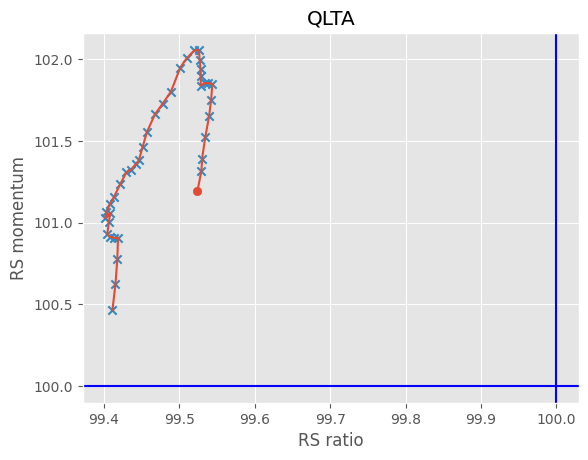

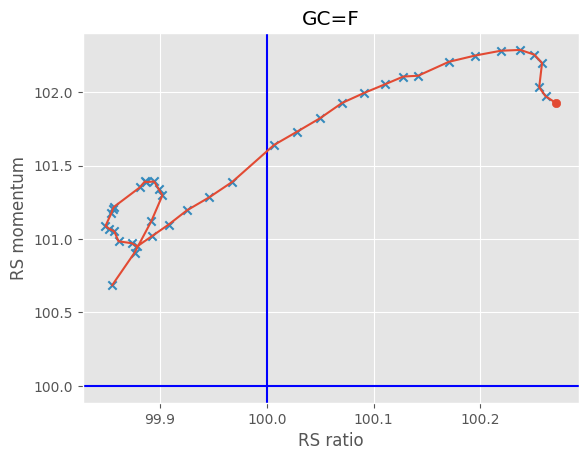

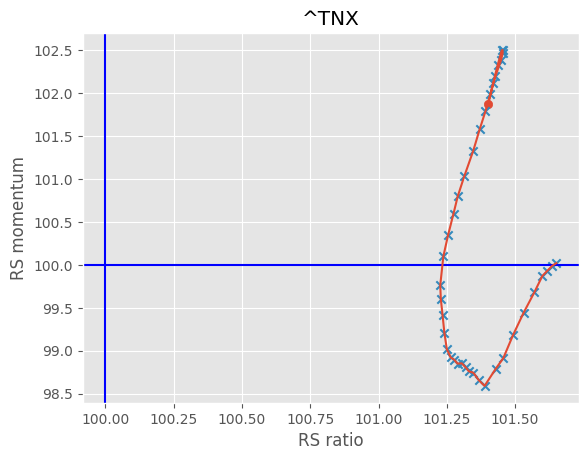

In [165]:
def rrg_plot(df, symbol, period = 20):
    """
    Method to visualize RRG plot for one market/symbol. The benchmark is SPY
    """
    df = df.copy()
    df =df.iloc[-period:]
    
    last = df.iloc[-1]    
    others = df.iloc[:-1]    

    plt.axvline(x = 100, color = 'b')
    plt.axhline(y = 100, color = 'b')

    plt.plot(df[f'{symbol}_ratio'], df[f'{symbol}_momentum'])
    plt.scatter(last[f'{symbol}_ratio'], last[f'{symbol}_momentum'], marker='o')
    plt.scatter(others[f'{symbol}_ratio'], others[f'{symbol}_momentum'], marker='x')

    plt.title(symbol)
    plt.xlabel("RS ratio")
    plt.ylabel("RS momentum")

    plt.show()
    

rrg_plot(df, 'QLTA', 40)
rrg_plot(df, 'GC=F', 40)
rrg_plot(df, '^TNX', 40)


#rrg_plot(df, 'MSFT', 40)
#rrg_plot(df, 'AMZN', 40)
#rrg_plot(df, 'GOOG', 40)
#rrg_plot(df, 'TSLA', 40)
#rrg_plot(df, 'AAPL', 40)